### Tutorial - Using COSMIC to evolve binaries

This notebook follows the 
[tutorial](https://cosmic-popsynth.github.io/docs/stable/examples/index.html)
provided by COSMIC author Katie Breivik.

COSMIC can evolve binaries for several different use cases. Below you’ll find
examples to run a single binary system, multiple binary systems or a grid of
binaries.

### single binary

Below is the process to initialize and evolve a binary that could have formed a 
GW150914-like binary. First, import the modules in COSMIC that initialize and 
evolve the binary.

In [2]:
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.evolve import Evolve

To initialize a single binary, populate the `InitialBinaries` method in the 
`InitialBinaryTable` class. Each initialized binary requires the following 
parameters:

- `m1` : ZAMS mass of the primary star in $M_{\odot}$
- `m2` : ZAMS mass of the secondary star in $M_{\odot}$
- `porb` : initial orbital period in days
- `ecc` : initial eccentricity
- `tphysf` : total evolution time of the binary in Myr
- `kstar1` : initial primary stellar type, following the 
[BSE convention](https://cosmic-popsynth.github.io/docs/stable/output_info/index.html)
- `kstar2` : initial secondary stellar type, following the 
[BSE convention](https://cosmic-popsynth.github.io/docs/stable/output_info/index.html)
- `metallicity` : metallicity of the population (e.g. $Z_{\odot}=0.014$)

In [3]:
single_binary = InitialBinaryTable.InitialBinaries(
    m1=85.543645, 
    m2=84.99784, 
    porb=446.795757, 
    ecc=0.448872, 
    tphysf=13700.0, 
    kstar1=1, 
    kstar2=1, 
    metallicity=0.002
)

print(single_binary)

   kstar_1  kstar_2     mass_1    mass_2        porb       ecc  metallicity  \
0      1.0      1.0  85.543645  84.99784  446.795757  0.448872        0.002   

    tphysf    mass0_1   mass0_2  ...  tacc_1  tacc_2  epoch_1  epoch_2  tms_1  \
0  13700.0  85.543645  84.99784  ...     0.0     0.0      0.0      0.0    0.0   

   tms_2  bhspin_1  bhspin_2  tphys  binfrac  
0    0.0       0.0       0.0    0.0      1.0  

[1 rows x 38 columns]


The flags for the various binary evolution prescriptions used in BSE also need 
to be set. Each flag is saved in the `BSEDict` dictionary. Note that the 
`BSEDict` only needs to be specified the first time a binary is evolved with 
COSMIC or if you need to change the binary evolution prescriptions.

If you are unfamiliar with these prescriptions, it is highly advised to either 
run the defaults from the COSMIC install which are consistent with 
[Breivik+2020](https://ui.adsabs.harvard.edu/abs/2020ApJ...898...71B/abstract)

In [4]:
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1}

Once the binary is initialized and the BSE model is set, the system is evolved 
with the the `Evolve` class, which calls the `evolv2.f` subroutine in the BSE 
source code.

In [5]:
bpp, bcm, initC, kick_info = Evolve.evolve(
    initialbinarytable=single_binary, 
    BSEDict=BSEDict
)

For every evolved binary system, BSE generates two arrays, which are stored as 
pandas DataFrames in COSMIC:

- `bpp` - contains binary parameters at important stages in the binary’s 
evolution, including stellar evolutionary phase changes or mass transfer 
episodes.
- `bcm` - contains several binary parameters at user specified time steps during 
the binary’s evolution. The default setting in COSMIC is to output the final 
stage of the binary at the evolution time specified by the user.

You can see the different parameters included in each `DataFrame` using the 
columns attribute of the `DataFrame`:

In [6]:
print(bpp.columns)

Index(['tphys', 'mass_1', 'mass_2', 'kstar_1', 'kstar_2', 'sep', 'porb', 'ecc',
       'RRLO_1', 'RRLO_2', 'evol_type', 'aj_1', 'aj_2', 'tms_1', 'tms_2',
       'massc_1', 'massc_2', 'rad_1', 'rad_2', 'mass0_1', 'mass0_2', 'lum_1',
       'lum_2', 'teff_1', 'teff_2', 'radc_1', 'radc_2', 'menv_1', 'menv_2',
       'renv_1', 'renv_2', 'omega_spin_1', 'omega_spin_2', 'B_1', 'B_2',
       'bacc_1', 'bacc_2', 'tacc_1', 'tacc_2', 'epoch_1', 'epoch_2',
       'bhspin_1', 'bhspin_2', 'bin_num'],
      dtype='object')


In [7]:
print(bcm.columns)

Index(['tphys', 'kstar_1', 'mass0_1', 'mass_1', 'lum_1', 'rad_1', 'teff_1',
       'massc_1', 'radc_1', 'menv_1', 'renv_1', 'epoch_1', 'omega_spin_1',
       'deltam_1', 'RRLO_1', 'kstar_2', 'mass0_2', 'mass_2', 'lum_2', 'rad_2',
       'teff_2', 'massc_2', 'radc_2', 'menv_2', 'renv_2', 'epoch_2',
       'omega_spin_2', 'deltam_2', 'RRLO_2', 'porb', 'sep', 'ecc', 'B_1',
       'B_2', 'SN_1', 'SN_2', 'bin_state', 'merger_type', 'bin_num'],
      dtype='object')


The units are broadly consistent with BSE and are described in 
[Describing the output of COSMIC/BSE: Columns names/Values/Units](https://cosmic-popsynth.github.io/docs/stable/output_info/index.html#output-info).

The `evol_type` column in `bpp` indicates the evolutionary change that occurred 
for each line. The meaning of each number is described here, 
[Evolve Type](https://cosmic-popsynth.github.io/docs/stable/output_info/index.html#evolve-type-table).

Each of the parameters in `bpp` or `bcm` can be accessed in the usual way for 
`DataFrames`:

In [8]:
bpp.mass_1

0    85.543645
0    72.720332
0    72.589218
0    71.959504
0    32.352601
0    32.176152
0    25.488585
0    24.988585
0    24.988590
0    24.989628
0    24.990676
0    24.990676
0    24.990676
0    24.990676
0    24.990687
0    24.990687
0    24.990687
Name: mass_1, dtype: float64

In [9]:
bpp = bpp[['mass_1', 'mass_2', 'kstar_1', 'kstar_2', 'sep', 'evol_type']]

You can use the `utils.convert_kstar_evol_type` function to convert the 
`kstar_1`, `kstar_2`, and `evol_type` columns from integers to strings that 
describe each int:

In [10]:
from cosmic.utils import convert_kstar_evol_type
convert_kstar_evol_type(bpp)

,mass_1,mass_2,kstar_1,kstar_2,sep,evol_type
0,85.543645,84.997840,"MS, > 0.7 M⊙","MS, > 0.7 M⊙",1363.435508,initial state
0,72.720332,72.376321,Hertzsprung Gap,"MS, > 0.7 M⊙",1602.531512,kstar change
0,72.589218,72.377845,Hertzsprung Gap,"MS, > 0.7 M⊙",883.827396,begin Roche lobe overflow
0,71.959504,72.806393,Core Helium Burning,"MS, > 0.7 M⊙",882.511619,kstar change
0,32.352601,110.573279,Core Helium Burning,"MS, > 0.7 M⊙",1614.251471,end Roche lobe overlow
0,32.176152,110.618802,Naked Helium Star MS,"MS, > 0.7 M⊙",1614.063847,kstar change
0,25.488585,106.891756,Naked Helium Star MS,"MS, > 0.7 M⊙",1741.069066,supernova of primary
0,24.988585,106.891756,Black Hole,"MS, > 0.7 M⊙",1747.695130,kstar change
0,24.988590,88.885767,Black Hole,Hertzsprung Gap,2023.280971,kstar change
0,24.989628,88.681512,Black Hole,Hertzsprung Gap,2018.828817,begin Roche lobe overflow


Note that `utils.convert_kstar_evol_type` is only applicable to the `bpp` array.

You can also use the built in plotting function to see how the system evolves:

/Users/ajarteag/opt/anaconda3/envs/astro/lib/python3.10/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "
/Users/ajarteag/opt/anaconda3/envs/astro/lib/python3.10/site-packages/cosmic/plotting.py:609: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  gs.tight_layout(fig)


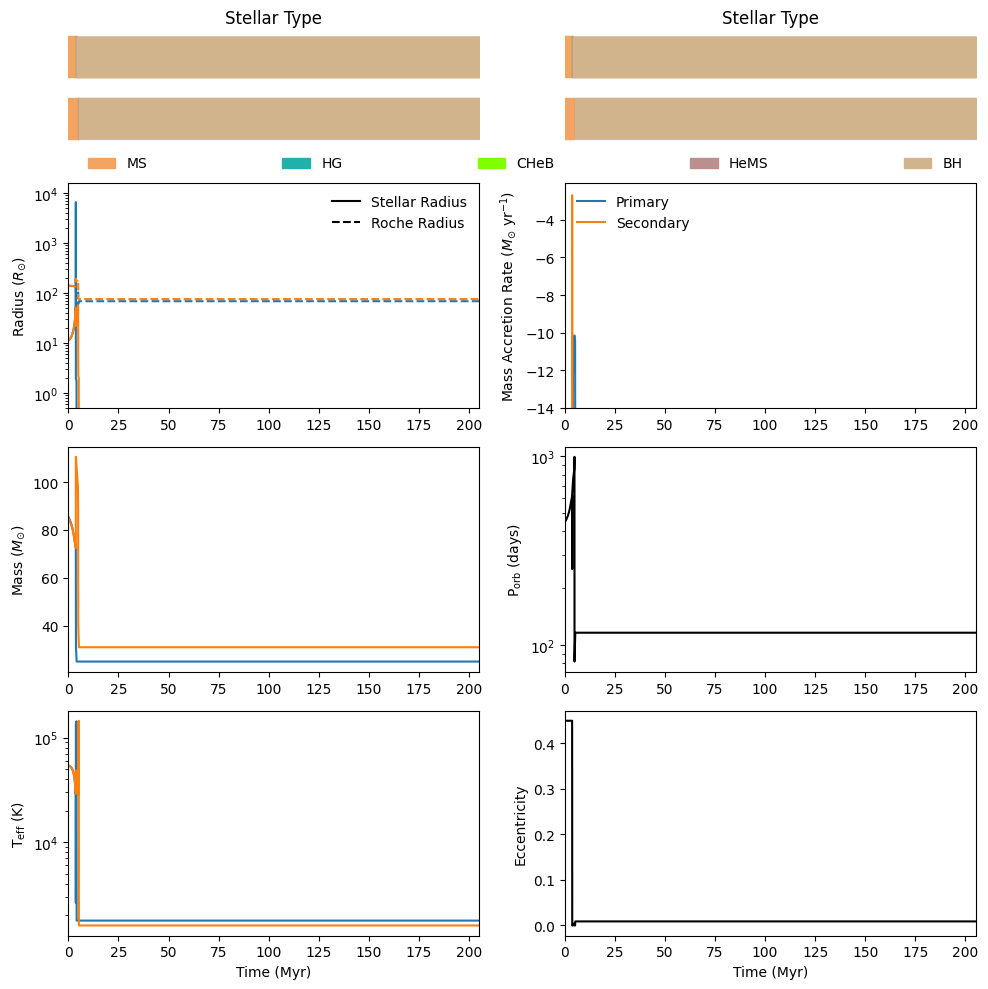

In [11]:
from cosmic.plotting import evolve_and_plot

single_binary = InitialBinaryTable.InitialBinaries(
    m1=85.543645, 
    m2=84.99784, 
    porb=446.795757, 
    ecc=0.448872, 
    tphysf=13700.0, 
    kstar1=1, 
    kstar2=1, 
    metallicity=0.002
)

BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1}

fig = evolve_and_plot(
    single_binary, 
    t_min=None, 
    t_max=None, 
    BSEDict=BSEDict, 
    sys_obs={}
)

In this case, all the action happens in the first few Myr, so let’s specify a 
`t_max`:

/Users/ajarteag/opt/anaconda3/envs/astro/lib/python3.10/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "
/Users/ajarteag/opt/anaconda3/envs/astro/lib/python3.10/site-packages/cosmic/plotting.py:609: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  gs.tight_layout(fig)


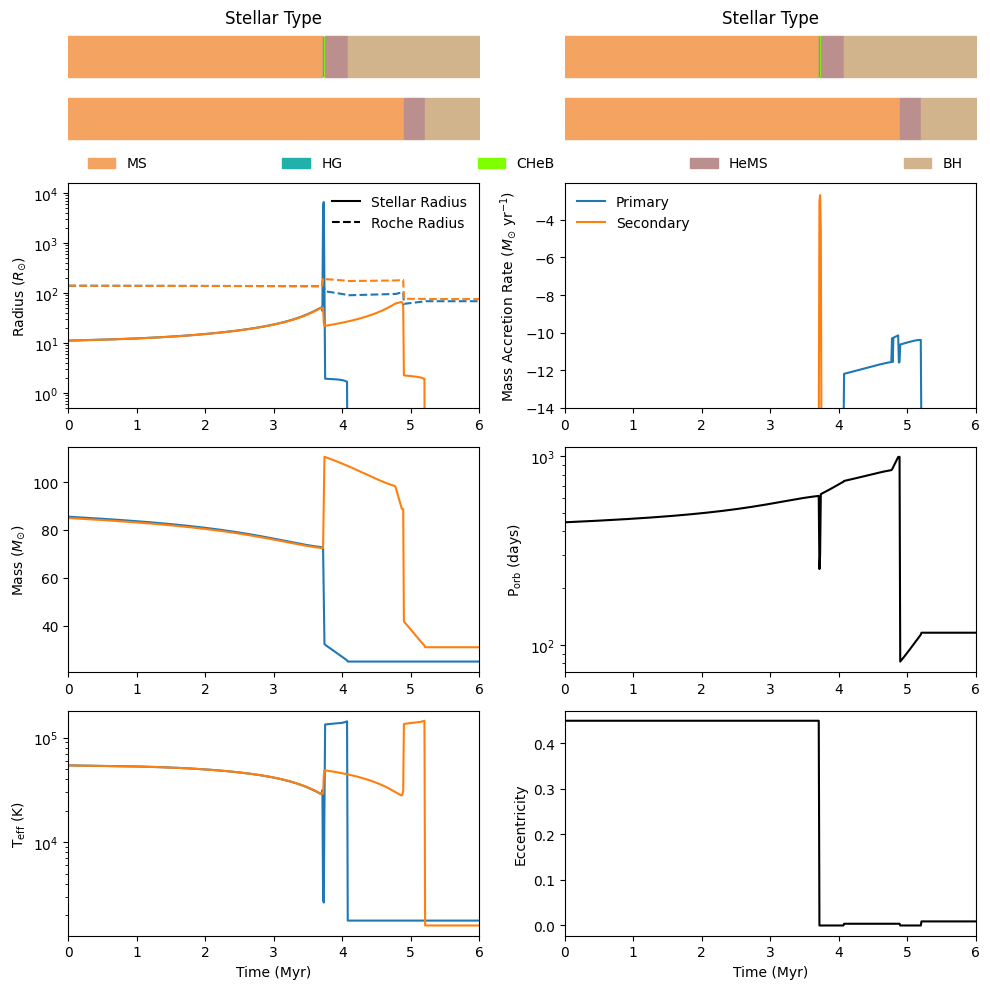

In [12]:
fig = evolve_and_plot(
    initC, 
    t_min=None, 
    t_max=6.0, 
    BSEDict={}, 
    sys_obs={}
)

### multiple binaries

Multiple systems can also be initialized and evolved; below is an example for 
systems that could form GW150914 and GW170817 - like binaries.

In [13]:
binary_set = InitialBinaryTable.InitialBinaries(
    m1=[85.543645, 11.171469], 
    m2=[84.99784, 6.67305], 
    porb=[446.795757, 170.758343], 
    ecc=[0.448872, 0.370], 
    tphysf=[13700.0, 13700.0], 
    kstar1=[1, 1], 
    kstar2=[1, 1], 
    metallicity=[0.002, 0.02]
)

print(binary_set)

   kstar_1  kstar_2     mass_1    mass_2        porb       ecc  metallicity  \
0      1.0      1.0  85.543645  84.99784  446.795757  0.448872        0.002   
1      1.0      1.0  11.171469   6.67305  170.758343  0.370000        0.020   

    tphysf    mass0_1   mass0_2  ...  tacc_1  tacc_2  epoch_1  epoch_2  tms_1  \
0  13700.0  85.543645  84.99784  ...     0.0     0.0      0.0      0.0    0.0   
1  13700.0  11.171469   6.67305  ...     0.0     0.0      0.0      0.0    0.0   

   tms_2  bhspin_1  bhspin_2  tphys  binfrac  
0    0.0       0.0       0.0    0.0      1.0  
1    0.0       0.0       0.0    0.0      1.0  

[2 rows x 38 columns]


In [15]:
import numpy as np

np.random.seed(5)

bpp, bcm, initC, kick_info = Evolve.evolve(
    initialbinarytable=binary_set, 
    BSEDict=BSEDict
)

/Users/ajarteag/opt/anaconda3/envs/astro/lib/python3.10/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "


Note that the `BSEDict` did not be reinitialized since the BSE model did not 
change.

As before, `bpp`, `bcm`, and `initC` are returned as pandas DataFrames which 
assign an index to each binary system we evolve. We can access each binary as 
follows:

In [16]:
print(bpp.loc[0])

        tphys     mass_1      mass_2  kstar_1  kstar_2          sep  \
0    0.000000  85.543645   84.997840      1.0      1.0  1363.435508   
0    3.717070  72.719783   72.376037      2.0      1.0  1602.540712   
0    3.718368  72.588666   72.377556      2.0      1.0   883.832613   
0    3.720007  71.958903   72.806115      4.0      1.0   882.510342   
0    3.739911  32.346795  110.583971      4.0      1.0  1616.153256   
0    3.741053  32.175552  110.600277      7.0      1.0  1617.101339   
0    4.071364  25.486398  106.874794      7.0      1.0  1744.364154   
0    4.071364  24.986398  106.874794     14.0      1.0  1751.003726   
0    4.894907  24.986403   88.691971     14.0      2.0  2030.288753   
0    4.896430  24.987444   88.487242     14.0      2.0  2025.833989   
0    4.897383  24.988491   88.276317     14.0      4.0  2024.854520   
0    4.897383  24.988491   88.276317     14.0      4.0  2024.854520   
0    4.897383  24.988491   41.858050     14.0      7.0   320.766753   
0    4

In [17]:
print(bcm.loc[0])

     tphys  kstar_1    mass0_1     mass_1         lum_1      rad_1  \
0     0.00      1.0  85.543645  85.543645  9.416137e+05  11.060285   
0     0.01      1.0  85.527367  85.527367  9.423653e+05  11.069603   
0     0.02      1.0  85.511049  85.511049  9.431226e+05  11.078928   
0     0.03      1.0  85.494691  85.494691  9.438858e+05  11.088262   
0     0.04      1.0  85.478292  85.478292  9.446548e+05  11.097605   
..     ...      ...        ...        ...           ...        ...   
0   205.15     14.0  25.486398  24.988501  1.000000e-10   0.000106   
0   205.16     14.0  25.486398  24.988501  1.000000e-10   0.000106   
0   205.17     14.0  25.486398  24.988501  1.000000e-10   0.000106   
0   205.18     14.0  25.486398  24.988501  1.000000e-10   0.000106   
0   205.19     14.0  25.486398  24.988501  1.000000e-10   0.000106   

          teff_1    massc_1    radc_1        menv_1  ...        porb  \
0   54306.854457   0.000000  0.000000  1.000000e-10  ...  446.795757   
0   54294.82039

In [18]:
print(initC.loc[0])

kstar_1        1.000000
kstar_2        1.000000
mass_1        85.543645
mass_2        84.997840
porb         446.795757
                ...    
fprimc_11      0.095238
fprimc_12      0.095238
fprimc_13      0.095238
fprimc_14      0.095238
fprimc_15      0.095238
Name: 0, Length: 136, dtype: float64


In [19]:
print(bpp.loc[1])

        tphys     mass_1    mass_2  kstar_1  kstar_2         sep        porb  \
1    0.000000  11.171469  6.673050      1.0      1.0  338.356712  170.758343   
1   19.427278  10.767909  6.664658      2.0      1.0  346.350714  178.922774   
1   19.461438  10.765777  6.664702      2.0      1.0  218.223971   89.489313   
1   19.476912  10.544417  6.884988      3.0      1.0  211.992707   85.686473   
1   19.476912  10.544417  6.884988      3.0      1.0  211.992707   85.686473   
1   19.476912   2.415442  6.884988      7.0      1.0   20.150243    3.437487   
1   19.476912   2.415442  6.884988      7.0      1.0   20.150243    3.437487   
1   22.952681   2.226294  6.887974      8.0      1.0   20.614122    3.593011   
1   23.231406   2.177806  6.896735      8.0      1.0   20.656641    3.612014   
1   23.254641   1.889676  7.181936      9.0      1.0   22.458960    4.095570   
1   23.256935   1.371085  7.700471      9.0      1.0   31.223370    6.713530   
1   23.258694   1.370344  7.700740     1

/Users/ajarteag/opt/anaconda3/envs/astro/lib/python3.10/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "
/Users/ajarteag/opt/anaconda3/envs/astro/lib/python3.10/site-packages/cosmic/plotting.py:609: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  gs.tight_layout(fig)
/Users/ajarteag/opt/anaconda3/envs/astro/lib/python3.10/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "
/Users/ajarteag/opt/anaconda3/envs/astro/lib/python3.10/site-packages/cosmic/plotting.py:609: UserWarning: This figure includes Axes that are not compatible with tigh

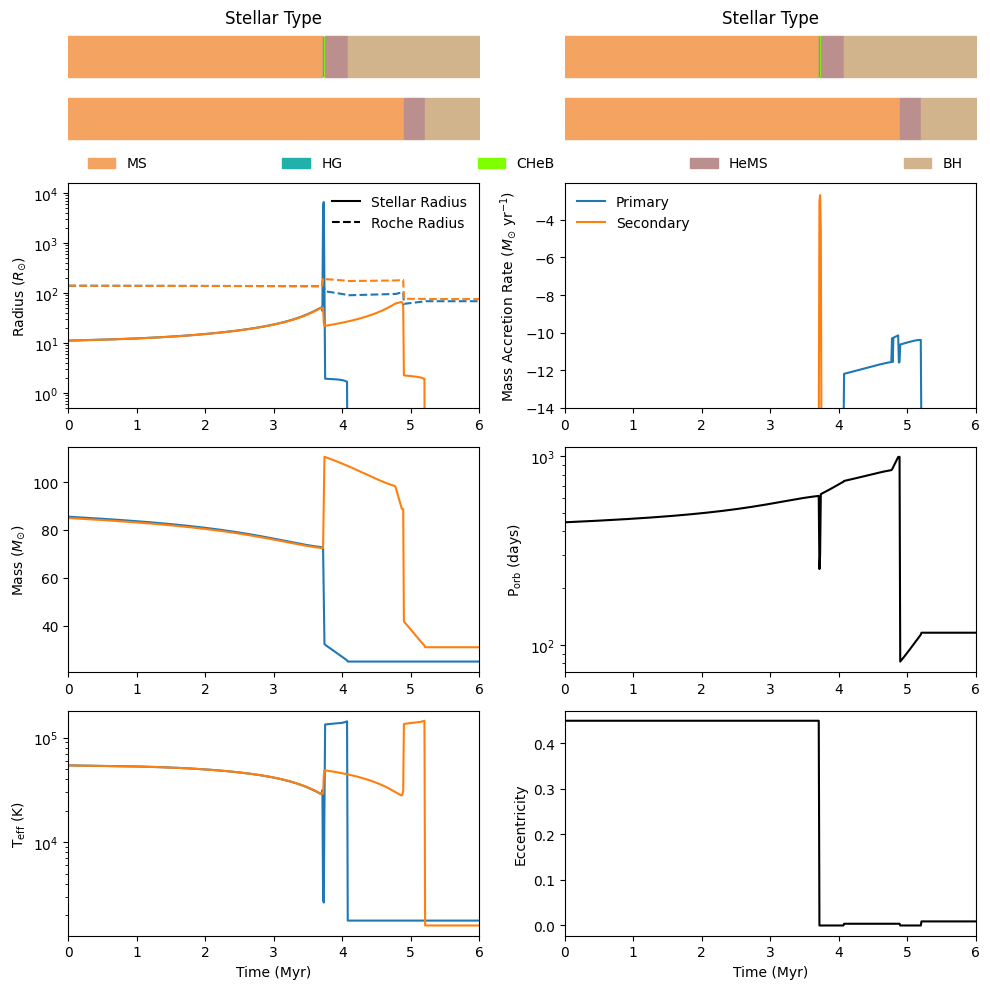

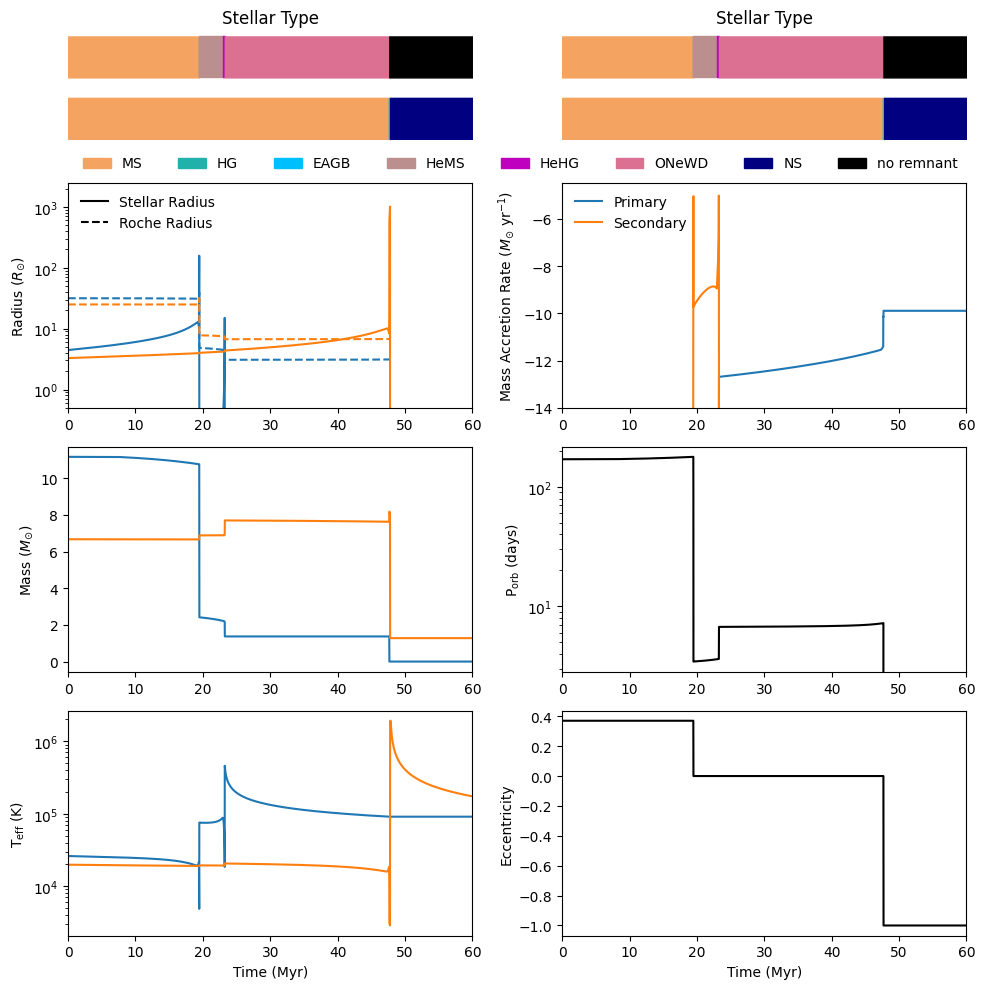

In [20]:
fig = evolve_and_plot(
    binary_set, 
    t_min=None, 
    t_max=[6.0, 60.0],
    BSEDict=BSEDict, 
    sys_obs={}
)

### grid of binaries

Sometimes it is helpful to run a grid of initial binaries to explore how 
changing a single paramter affects the evolved binary. Here we evolve the same 
system that produces a GW150914-like binary, but run over several initial 
orbital periods spaced evenly in log space.

In [21]:
n_grid = 10

binary_grid = InitialBinaryTable.InitialBinaries(
    m1=np.ones(n_grid)*100.0, 
    m2=np.ones(n_grid)*85.0, 
    porb=np.logspace(3,5,n_grid), 
    ecc=np.ones(n_grid)*0.65, 
    tphysf=np.ones(n_grid)*13700.0, 
    kstar1=np.ones(n_grid), 
    kstar2=np.ones(n_grid), 
    metallicity=np.ones(n_grid)*0.005
)

BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1}

print(binary_grid)

   kstar_1  kstar_2  mass_1  mass_2           porb   ecc  metallicity  \
0      1.0      1.0   100.0    85.0    1000.000000  0.65        0.005   
1      1.0      1.0   100.0    85.0    1668.100537  0.65        0.005   
2      1.0      1.0   100.0    85.0    2782.559402  0.65        0.005   
3      1.0      1.0   100.0    85.0    4641.588834  0.65        0.005   
4      1.0      1.0   100.0    85.0    7742.636827  0.65        0.005   
5      1.0      1.0   100.0    85.0   12915.496650  0.65        0.005   
6      1.0      1.0   100.0    85.0   21544.346900  0.65        0.005   
7      1.0      1.0   100.0    85.0   35938.136638  0.65        0.005   
8      1.0      1.0   100.0    85.0   59948.425032  0.65        0.005   
9      1.0      1.0   100.0    85.0  100000.000000  0.65        0.005   

    tphysf  mass0_1  mass0_2  ...  tacc_1  tacc_2  epoch_1  epoch_2  tms_1  \
0  13700.0    100.0     85.0  ...     0.0     0.0      0.0      0.0    0.0   
1  13700.0    100.0     85.0  ...     0.

In [22]:
bpp, bcm, initC, kick_info = Evolve.evolve(
    initialbinarytable=binary_grid, 
    BSEDict=BSEDict
)

print(bpp)

           tphys      mass_1     mass_2  kstar_1  kstar_2            sep  \
0       0.000000  100.000000  85.000000      1.0      1.0    2397.042879   
0       3.561836   74.433283  67.900444      2.0      1.0    3115.630394   
0       3.563725   74.195874  67.901480      2.0      1.0    1092.094610   
0       3.564957   73.978352  67.965270      4.0      1.0    1091.881014   
0       3.656147   34.358643  98.037335      4.0      1.0    1408.149978   
..           ...         ...        ...      ...      ...            ...   
9       3.930319   28.153730  35.520384     14.0      4.0  145944.185323   
9       3.960762   28.159154  31.484483     14.0      7.0  155710.880212   
9       4.100892   28.159154  24.732495     14.0      7.0  175601.417611   
9       4.100892   28.159154  24.232495     14.0     14.0  176106.917874   
9   13700.000000   28.159154  24.232495     14.0     14.0  176006.476637   

            porb       ecc        RRLO_1        RRLO_2  ...  B_2  bacc_1  \
0   1.00000

In [23]:
print(bcm)

     tphys  kstar_1     mass0_1      mass_1         lum_1      rad_1  \
0      0.0      1.0  100.000000  100.000000  1.240906e+06  13.897608   
0  13700.0     14.0   22.440552   21.943153  1.000000e-10   0.000093   
1      0.0      1.0  100.000000  100.000000  1.240906e+06  13.897608   
1  13700.0     14.0   23.651593   23.154215  1.000000e-10   0.000098   
2      0.0      1.0  100.000000  100.000000  1.240906e+06  13.897608   
2  13700.0     14.0   25.319576   25.079267  1.000000e-10   0.000106   
3      0.0      1.0  100.000000  100.000000  1.240906e+06  13.897608   
3  13700.0     14.0   27.066154   26.858148  1.000000e-10   0.000114   
4      0.0      1.0  100.000000  100.000000  1.240906e+06  13.897608   
4  13700.0     14.0   24.723822   24.223941  1.000000e-10   0.000103   
5      0.0      1.0  100.000000  100.000000  1.240906e+06  13.897608   
5  13700.0     14.0   29.517261   29.070937  1.000000e-10   0.000123   
6      0.0      1.0  100.000000  100.000000  1.240906e+06  13.89

### dynamically set time resolution for bcm array

COSMIC has the ability to set time resolution of the `bcm` array depending on 
the current state of the evolution. Below we demonstrate three scenarios, 
setting `dtp` only during mass transfer, setting `dtp` to the same resolution 
for all of the evolution except for after the system merges or is disrupted, and 
finally an example of setting `dtp` only during the HMB stage of the evolution.

First, print all time steps during mass transfer

In [24]:
single_binary = InitialBinaryTable.InitialBinaries(
    m1=7.806106, 
    m2=5.381412,
    porb=2858.942021, 
    ecc=0.601408, 
    tphysf=13700.0, 
    kstar1=1, 
    kstar2=1, 
    metallicity=0.02
)

BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1}

bpp, bcm, initC, kick_info = Evolve.evolve(
    initialbinarytable=single_binary, 
    BSEDict=BSEDict, 
    timestep_conditions =[['RRLO_1>=1', 'dtp=0.0'], ['RRLO_2>=1', 'dtp=0.0']]
)

print(
    bcm[
        ['tphys', 'kstar_1', 'kstar_2', 'mass_1', 'mass_2', 'RRLO_1', 'RRLO_2']
    ]
)

           tphys  kstar_1  kstar_2    mass_1    mass_2    RRLO_1    RRLO_2
0       0.000000      1.0      1.0  7.806106  5.381412  0.010953  0.010459
0      43.565604      5.0      1.0  7.346069  5.396914  1.000222  0.008730
0      43.565604      8.0      1.0  2.037972  5.396914  0.520417  0.110930
0      43.579670      8.0      1.0  2.032299  5.399465  1.000951  0.110963
0      43.579674      8.0      1.0  2.032297  5.399466  1.001137  0.110963
..           ...      ...      ...       ...       ...       ...       ...
0      43.610746      9.0      1.0  1.323823  6.103425  1.704861  0.064712
0      43.611735      9.0      1.0  1.322435  6.104787  0.033876  0.064677
0      80.634129     12.0      2.0  1.321769  6.083292  0.000090  1.000175
0      80.634129     15.0      5.0  0.000000  5.225974 -1.000000  0.000100
0   13700.000000     15.0     13.0  0.000000  1.277584 -1.000000  0.000100

[107 rows x 7 columns]


Second, pick a certain resolution for the `bcm` array until the system mergers 
or is disrutped and then only print the final state

In [25]:
bpp, bcm, initC, kick_info = Evolve.evolve(
    initialbinarytable=single_binary, 
    BSEDict=BSEDict, 
    timestep_conditions=[['binstate=0', 'dtp=1.0']]
)

print(bcm[['tphys', 'kstar_1', 'kstar_2', 'mass_1', 'mass_2', 'bin_state']])

      tphys  kstar_1  kstar_2    mass_1    mass_2  bin_state
0       0.0      1.0      1.0  7.806106  5.381412          0
0       1.0      1.0      1.0  7.805049  5.381334          0
0       2.0      1.0      1.0  7.803970  5.381256          0
0       3.0      1.0      1.0  7.802864  5.381177          0
0       4.0      1.0      1.0  7.801731  5.381097          0
..      ...      ...      ...       ...       ...        ...
0      78.0     12.0      1.0  1.321764  6.085939          0
0      79.0     12.0      1.0  1.321764  6.085078          0
0      80.0     12.0      1.0  1.321764  6.084196          0
0      81.0     15.0     13.0  0.000000  1.277584          1
0   13700.0     15.0     13.0  0.000000  1.277584          1

[83 rows x 6 columns]


Finally, we show how to print a fine resolution only during the HMXB stage of 
the evolution.

In [26]:
single_binary = InitialBinaryTable.InitialBinaries(
    m1=85.543645, 
    m2=84.99784, 
    porb=446.795757, 
    ecc=0.448872, 
    tphysf=13700.0, 
    kstar1=1, 
    kstar2=1, 
    metallicity=0.002
)

BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1}

bpp, bcm, initC, kick_info = Evolve.evolve(
    initialbinarytable=single_binary, 
    BSEDict=BSEDict, 
    timestep_conditions=[
        ['kstar_1=14', 'kstar_2<10','dtp=0.1'], 
        ['kstar_2=14', 'kstar_1<10','dtp=0.1']
    ]
)

print(bcm[['tphys', 'kstar_1', 'kstar_2', 'mass_1', 'mass_2', 'bin_state']])

          tphys  kstar_1  kstar_2     mass_1      mass_2  bin_state
0      0.000000      1.0      1.0  85.543645   84.997840          0
0      4.071374     14.0      1.0  24.988585  106.891756          0
0      4.171374     14.0      1.0  24.988586  105.634889          0
0      4.271374     14.0      1.0  24.988586  104.335873          0
0      4.371374     14.0      1.0  24.988586  103.016130          0
0      4.471374     14.0      1.0  24.988586  101.707633          0
0      4.571374     14.0      1.0  24.988586  100.454871          0
0      4.671374     14.0      1.0  24.988586   99.314847          0
0      4.771374     14.0      1.0  24.988586   98.352198          0
0      4.871374     14.0      1.0  24.988590   89.040292          0
0      4.971374     14.0      7.0  24.990678   39.441122          0
0      5.071374     14.0      7.0  24.990681   35.988161          0
0      5.171374     14.0      7.0  24.990685   32.642016          0
0      5.271374     14.0     14.0  24.990687   3

### restarting a binary

COSMIC allows you to restart a binary from any point in its evolution from a 
COSMIC generated `bpp` array. Below we provide an example of the same evolutionary 
track started from the beginning and three different points in the evolution, 
once sometime between the beginning and the first object going supernova, once 
between the first and second supernova, and finally after both supernova.

In [27]:
single_binary = InitialBinaryTable.InitialBinaries(
    m1=25.543645, 
    m2=20.99784, 
    porb=446.795757, 
    ecc=0.448872, 
    tphysf=13700.0, 
    kstar1=1, 
    kstar2=1, 
    metallicity=0.002
)
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'remnantflag': 3, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.5, 'ecsn_mlow' : 1.4, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 0, 'bdecayfac' : 1, 'randomseed' : -1235453, 'grflag' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014,  'grflag' : 1, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1}
for i in [3, 7, 11]:
    bpp, bcm, initC, kick_info = Evolve.evolve(
        initialbinarytable=single_binary, 
        BSEDict=BSEDict
    )
    for column in bpp.columns:
        initC = initC.assign(**{column:bpp.iloc[i][column]})
    bpp_mid, bcm_mid, initC_mid, kick_info = Evolve.evolve(
        initialbinarytable=initC
    )
    if i == 3:
        print("From beginning")
        print(bpp)
    print("Started in middle at Index {0}".format(i))
    print(bpp_mid)

/Users/ajarteag/opt/anaconda3/envs/astro/lib/python3.10/site-packages/cosmic/evolve.py:258: UserWarning: The value for randomseed in initial binary table is being overwritten by the value of randomseed from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "


From beginning
          tphys     mass_1     mass_2  kstar_1  kstar_2          sep  \
0      0.000000  25.543645  20.997840      1.0      1.0   884.378139   
0      7.710210  24.912154  20.771614      2.0      1.0   900.982085   
0      7.721745  24.907454  20.771066      4.0      1.0   901.078093   
0      8.032373  24.637985  20.771096      4.0      1.0   498.880188   
0      8.182494   8.914102  36.245338      4.0      1.0  1165.861327   
0      8.197721   8.892584  36.248874      7.0      1.0  1165.796053   
0      8.475201   8.580568  36.159238      8.0      1.0  1176.260424   
0      8.507067   8.527311  36.148463      8.0      1.0  1177.946251   
0      8.507067   8.027311  36.148463     14.0      1.0  1191.431372   
0     11.026338   8.027311  34.999375     14.0      2.0  1222.553338   
0     11.033158   8.027396  34.984217     14.0      4.0  1222.956528   
0     11.174787   8.045877  33.801409     14.0      4.0  1235.870758   
0     11.174787   8.045877  33.801409     14.0   

/Users/ajarteag/opt/anaconda3/envs/astro/lib/python3.10/site-packages/cosmic/evolve.py:258: UserWarning: The value for randomseed in initial binary table is being overwritten by the value of randomseed from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "


Started in middle at Index 7
          tphys    mass_1     mass_2  kstar_1  kstar_2          sep  \
0     11.026338  8.027311  34.999375     14.0      2.0  1349.485243   
0     11.033158  8.027386  34.984217     14.0      4.0  1349.933701   
0     11.181827  8.046184  33.708667     14.0      4.0  1382.823085   
0     11.181827  8.046184  33.708667     14.0      4.0  1382.823085   
0     11.181827  8.046184  12.630306     14.0      7.0     6.508340   
0     11.181827  8.046184  12.630306     14.0      7.0     6.508340   
0     11.739573  8.070479  11.376860     14.0      8.0     6.844666   
0     11.760725  8.072082  11.311782     14.0      8.0     6.864175   
0     11.760725  8.072082   7.545753     14.0     14.0    15.811901   
0   2460.731634  8.072082   7.545753     14.0     14.0     0.000088   
0   2460.731634  8.580568  15.617835     15.0     14.0     0.000000   
0  13708.507067  0.000000  15.617835     15.0     14.0     0.000000   

           porb       ecc        RRLO_1    RRLO

/Users/ajarteag/opt/anaconda3/envs/astro/lib/python3.10/site-packages/cosmic/evolve.py:258: UserWarning: The value for randomseed in initial binary table is being overwritten by the value of randomseed from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "


Started in middle at Index 11
          tphys    mass_1     mass_2  kstar_1  kstar_2          sep  \
0     11.174787  8.045877  33.801409     14.0      4.0  1235.870758   
0     11.174787  8.045877  33.801409     14.0      4.0  1235.870758   
0     11.174787  8.045877  12.596825     14.0      7.0     6.018868   
0     11.174787  8.045877  12.596825     14.0      7.0     6.018868   
0     11.734078  8.073469  11.349337     14.0      8.0     6.293155   
0     11.755374  8.075302  11.284194     14.0      8.0     6.310894   
0     11.755374  8.075302   7.508749     14.0     14.0     6.594537   
0    287.001952  8.075302   7.508749     14.0     14.0     0.000086   
0    287.001952  8.580568  15.584051     15.0     14.0     0.000000   
0  13711.174787  0.000000  15.584051     15.0     14.0     0.000000   

           porb       ecc        RRLO_1    RRLO_2  ...  B_2  bacc_1  bacc_2  \
0  7.783915e+02  0.000000  1.045352e-07  1.000951  ...  0.0     0.0     0.0   
0  7.783915e+02  0.000000  1.0